In [1]:
import visuals as vs

import numpy as np
import pandas as pd
#from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
#import visuals as vs

# Pretty display for notebooks
%matplotlib inline


#dataN = pd.read_csv('Normal.csv')
#dataS = pd.read_csv('Sick.csv')
dataS = pd.read_csv('Hajj.csv')
#Temp = dataN['Temp']
Temp = dataS['Temp']
#BP = dataN['Blood pressure']
#BP = dataS['Blood pressure']

#print("Normal people dataset has {} data points with {} variables each.".format(*dataN.shape))
print("Mixed (Sick and Non-sick) people dataset has {} data points with {} variables each.".format(*dataS.shape))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


Mixed (Sick and Non-sick) people dataset has 1000 data points with 3 variables each.


In [2]:
minimum_Temp = min(Temp)
#minimum_BP = min(BP)
maximum_Temp = max(Temp)
#maximum_BP = max(BP)

mean_Temp = np.mean(Temp)
#mean_BP = np.mean(BP)

median_Temp = np.median(Temp)
#median_BP = np.median(BP)

std_Temp = np.std(Temp)
#std_BP = np.std(BP)

# Show the calculated statistics
print("Statistics for Tempreture dataset:\n")
print("Minimum Temp: {}".format(minimum_Temp)) 
print("Maximum Temp : {}".format(maximum_Temp))
print("Mean Temp: {}".format(mean_Temp))
print("Median Temp {}".format(median_Temp))
print("Standard deviation of Temp: {}".format(std_Temp))
'''
print("Statistics for Blood Pressur dataset:\n")
print("Minimum Blood Pressur: {}".format(minimum_BP)) 
print("Maximum Blood Pressur: {}".format(maximum_BP))
print("Mean Blood Pressur: {}".format(mean_BP))
print("Median Blood Pressur {}".format(median_BP))
print("Standard deviation of Blood Pressur: {}".format(std_BP))
'''

Statistics for Tempreture dataset:

Minimum Temp: 33
Maximum Temp : 43
Mean Temp: 38.073
Median Temp 38.0
Standard deviation of Temp: 3.1852269934810025


'\nprint("Statistics for Blood Pressur dataset:\n")\nprint("Minimum Blood Pressur: {}".format(minimum_BP)) \nprint("Maximum Blood Pressur: {}".format(maximum_BP))\nprint("Mean Blood Pressur: {}".format(mean_BP))\nprint("Median Blood Pressur {}".format(median_BP))\nprint("Standard deviation of Blood Pressur: {}".format(std_BP))\n'

In [3]:
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import ShuffleSplit

#Temp = dataN['Temp']
#Blood_Pressure = dataN['Blood pressure']
#features = data.drop('Temp', axis = 1)
Temp = dataS['Temp']
#Blood_Pressure = dataS['Blood pressure']
features = dataS.drop('Temp', axis = 1)

#ShuffleSplit(test_size=0.2, train_size=0.8, random_state=4)
X_train, X_test, y_train, y_test = train_test_split( features, Temp, test_size=0.2, random_state=4)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


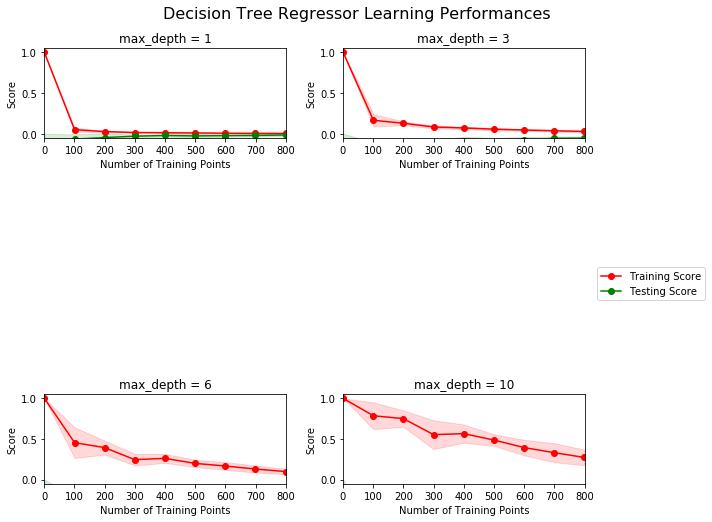

In [5]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, Temp)

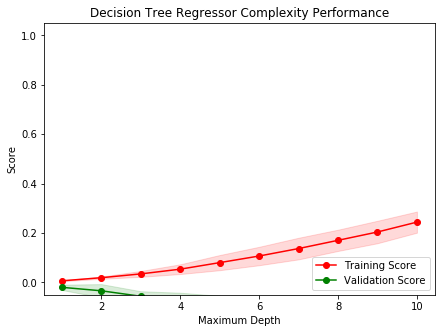

In [6]:
vs.ModelComplexity(X_train, y_train)

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    #cv_sets = ShuffleSplit(X.shape[0], n_splits = 10, test_size = 0.20, random_state = 0)
    #cv_sets = ShuffleSplit(X.shape[0], n_splits = 10, test_size = 0.20, random_state = 4)
    cv_sets = ShuffleSplit(n_splits=10, test_size=0.2, random_state=4)
    
    regressor = DecisionTreeRegressor(random_state=4)

    dt_range = range(1, 11)
    params = dict(max_depth=dt_range)
    
    scoring_fnc = make_scorer(performance_metric)

    grid = GridSearchCV (regressor , params , cv=cv_sets, scoring=scoring_fnc)

    grid = grid.fit(X, y)

    return grid.best_estimator_

In [8]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 1 for the optimal model.


In [9]:
# Produce a matrix for client data
client_data = [[967, 39], # Client 1
               [213, 32], # Client 2
               [966, 45]]  # Client 3

# Show predictions
for i, Temp in enumerate(reg.predict(client_data)):
    print("Predicted Tempreture for Coutry {}'s Hajji: {:,.2f}".format(i+1, Temp))

Predicted Tempreture for Coutry 1's Hajji: 38.12
Predicted Tempreture for Coutry 2's Hajji: 38.12
Predicted Tempreture for Coutry 3's Hajji: 38.12
